# An encounter with the Schrödinger equation

<b>Author</b> Audun Skau Hansen <a href="mailto:a.s.hansen@kjemi.uio.no">✉️</a> 

The Hylleraas Centre for Quantum Molecular Sciences, 2022

---

## Overview

The Schrödinger equation is a partial differential equation. This means that it is a **relation** between a function itself, which we shall denote $\Psi$, and its derivatives with respect to it's variables, such as $x$ and $t$. Any function that satisfy this relation constitutes a possible $\Psi$, and is thus a valid solution of the equation. 

It is unclear exactly what lead Schrödinger to the Schrödinger equation. It even seems that the order in which discoveries were made at the dawn of the quantum age is a little bit peculiar. When De Broglie proposed his matter-waves some years prior to Schrödinger, he proposed solutions to an equation which did not yet exist. Only a few years after Schrödinger's contribution, Born came up with a way of interpreting the solution.

This is all somewhat abstract, and you may not know much about Schrödingers equation and it's solutions yet, so let's explore one possible route leading us to it.

## A plane wave

A complex plane wave is a very general representation of a wave that can account for almost any kind of wave-behaviour you encounter. Fourier analysis shows us that these waves may actually be used to represent any kind of function - complex or real - by adding many of them together with the suitable factor in front. 

These waves are typically written (in 1D)

$$
\Psi(x,t) = A e ^{-i2\pi \frac{x}{\lambda}} e ^{-i2\pi tf}
$$

You may have a look on their shape and time-dependence by exploring the following script:

<IPython.core.display.Javascript object>


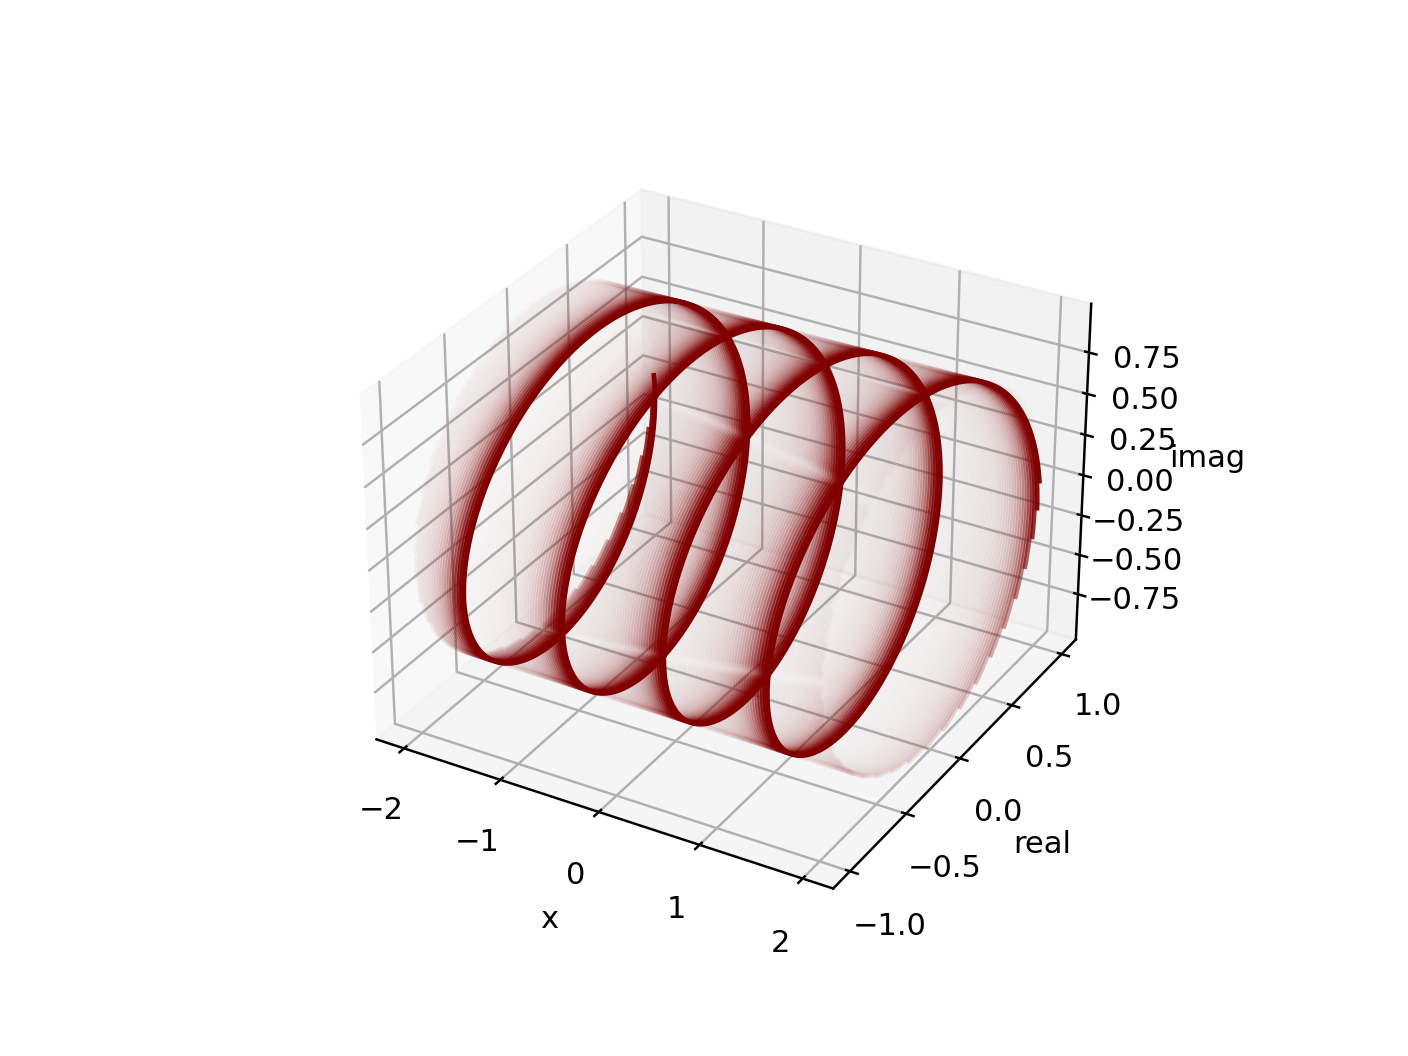

/var/folders/s2/s91psjjx77g3znkybg2ng_b40000gn/T/ipykernel_5323/1746839377.py:8: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  w = lambda x, t, l=1, f=1, A=1 : A*np.exp(-np.complex(0,1)*2*np.pi*x/l)*np.exp(-np.complex(0,1)*2*np.pi*f*t)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook
ax = plt.axes(projection="3d")

# a plane wave
w = lambda x, t, l=1, f=1, A=1 : A*np.exp(-np.complex(0,1)*2*np.pi*x/l)*np.exp(-np.complex(0,1)*2*np.pi*f*t) 

# a grid in x
x = np.linspace(-2,2,1000)

# plot for different times, older snapshots are faded
for t in np.linspace(0,1,40):
    ax.plot3D(x, w(x, t).real, w(x, t).imag, alpha = 1/(1 + 100*t**2), color = (.5,0,0))
ax.set_xlabel("x")
ax.set_ylabel("real")
ax.set_zlabel("imag")
plt.show()

```{admonition} Try it out
    - How does it look when you rotate it to the x-real plane?
    - How about the x-imaginary plane?
    - How does it evolve in time?
```

## The Schrödinger equation

You may verify for yourself that the plane waves are valid solutions to the classical wave-equation

$$
\Big{(}\frac{\partial}{\partial x}\Big{)}^2 \Psi(x,t)  = c^2 \Big{(}\frac{\partial}{\partial t}\Big{)}^2 \Psi(x,t),
$$

but how about de Broglie's *matter-waves*? What is the equation determining their evolution in time?

The plane waves are individually roaming the whole of the x-axis, periodically repeating the same curve over and over. They are not bound by any potential term concentrating them to one region or pushing them away from others. Just like a free particle, they represent a wave in the absence of external interaction.

For a socalled *free particle*, in the absence of a potential, the total energy is classically simply the kinetic energy

$$
E = \frac{1}{2}mv^2 = \frac{1}{2m}p^2.
$$

Could we somehow recover the energy $E$ and the momentum $p$ from the plane wave expression? Let's do just that, and even better, let's leave the algebra to sympy:

In [5]:
import sympy as sp
sp.init_printing() #allow mathjax / nice formatting

# some symbols
x,t,f,l,A, h, m = sp.symbols("x t f \lambda A h m")
i = complex(0,1)
pi = sp.pi

#a plane wave

psi = A*sp.exp(-i*2*pi*x/l)*sp.exp(i*2*pi*f*t)
psi #display on screen

You recall the <a href="https://en.wikipedia.org/wiki/Planck%E2%80%93Einstein_relation">Planck-Einstein</a> relations and <a href="https://en.wikipedia.org/wiki/Planck%E2%80%93Einstein_relation#de_Broglie_relation">de Broglies hypothesis</a>, right? We shall use them in the following:

In [6]:
# Planck-Einstein relations

# some symbols
E, p = sp.symbols("E p")

# since E = hf we can substitute  f = E/h
psi = psi.subs(f, E/h)

# and since p = h/lambda, lambda = h/p
psi = psi.subs(l, h/p)

# show the result
psi

Can we obtain expressions for $E$ and $p$ from this wave?  Notice that

In [7]:
sp.diff(psi, t, 1) #first order derivative of psi with respect to t

just factors in a new term in front of the wave.

From this we may reorganise the terms to conclude that
$$
i \hbar \frac{\partial }{\partial t}\Psi = E \Psi
$$

For the spatial part, we tinker a bit to find

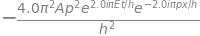

In [8]:
sp.diff(psi, x, 2) #second order derivative of psi with respect to x

from which we similarly determine that

$$
-\hbar^2 \frac{\partial^2 }{\partial x^2} \Psi = p^2 \Psi.
$$

---

Now let's gather our results. In sum, we have found that

$$
\frac{1}{\Psi}(i \hbar \frac{\partial }{\partial t}\Psi) = E 
$$

and

$$
\frac{1}{\Psi}(-\hbar^2 (\frac{\partial }{\partial x})^2) \Psi = p^2.
$$

How does this align with the free particle energy

$$
E = \frac{1}{2m}p^2
$$
?

By combining these three expression, we find that

$$
\frac{1}{\Psi}(i \hbar \frac{\partial }{\partial t}\Psi) = \frac{1}{2m}\frac{1}{\Psi}(-\hbar^2 \frac{\partial^2}{\partial x}^2) \Psi
$$

Simplifying further (multiply by $\Psi$ and switch sides) yields

$$
 -\frac{\hbar^2}{2m}\frac{\partial^2 }{\partial x^2} \Psi = i \hbar \frac{\partial }{\partial t}\Psi.
$$

In a final step, we may generalize to arbitrary potentials in the same manner as we did for the wave equation:

$$
\Big{ (}-\frac{\hbar^2}{2m}\frac{\partial^2 }{\partial x^2} + V(x) \Big{)} \Psi = i \hbar \frac{\partial }{\partial t}\Psi.
$$

**Some comments** are appropriate: we just stumbled over the Schrödinger equation. It is on of our most appreciated scientific results. If you memorize this equation together with de Broglies curious insight, travel 200 years back in time, and convince people back in the day that *this* is the way to approach chemistry, you would probably revolutionize their society beyond recognizion in only a few years.

This is also the equation that we will have to solve in order to determine most of the chemical systems in consideration, and it is (with some modifications required for the relativistic case) *the* equation that governs nature on the electronic scale. Now you have been introduced as properly as I could manage, you know where to find it, and over the coming months I hope you two will build an everlasting friendship.